# Tugas Berita

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3799257/hoaks-kpu-tolak-pendaftaran-gibran-rakabuming-sebagai-bakal-cawapres-pada-25-oktober"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div' ,class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
sentences = nltk.sent_tokenize(article_text)

# Cetak kalimat-kalimat
for sentence in sentences:
    print(sentence)



Jakarta (ANTARA/JACX) – Ketua Umum Partai Gerindra sekaligus bakal calon presiden Prabowo Subianto, secara resmi mengumumkan bahwa putra sulung Presiden Joko Widodo, Gibran Rakabuming Raka, telah dipilih sebagai bakal cawapres dari Partai Gerindra pada Minggu, (22/10/2023).
Sebuah unggahan video di Facebook berdurasi delapan menit menarasikan bahwa KPU menolak pendaftaran Gibran karena dinyatakan cacat hukum.
Dalam video tersebut, narator juga menyebutkan pakar hukum tata negara Denny Indrayana menyebut putusan MK tentang syarat capres-cawapres tidak bisa dijadikan landasan hukum Gibran Rakabuming Raka dalam mendaftar Pilpres 2024.
Berikut narasi dalam unggahan tersebut:
“NEWS HARI INI ~ DINYATAKAN C4CAT HUKUM KPU TOL4K PENDAFTAN CAWAPRES GIBRAN-- - POLITIK TERBARU”

Namun, benarkah KPU menolak pendaftaran Gibran Rakabuming sebagai bakal cawapres?
Unggahan video hoaks yang menarasikan KPU tolak pendaftaran Gibran Rakabuming sebagai Cawapres pada 25 Oktober.
Faktanya, belum ada inform

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#menghitung dan mencetak nilai TF-IDF (Term Frequency-Inverse Document Frequency)
#untuk setiap kata dalam setiap kalimat dari teks yang telah di-tokenisasi sebelumnya.
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 

Jakarta (ANTARA/JACX) – Ketua Umum Partai Gerindra sekaligus bakal calon presiden Prabowo Subianto, secara resmi mengumumkan bahwa putra sulung Presiden Joko Widodo, Gibran Rakabuming Raka, telah dipilih sebagai bakal cawapres dari Partai Gerindra pada Minggu, (22/10/2023).
10: 0.1435
2023: 0.1435
22: 0.1653
antara: 0.1281
bahwa: 0.1435
bakal: 0.2126
calon: 0.1653
cawapres: 0.0789
dari: 0.1281
dipilih: 0.1653
gerindra: 0.3305
gibran: 0.0608
jacx: 0.1653
jakarta: 0.1653
joko: 0.1653
ketua: 0.1435
mengumumkan: 0.1653
minggu: 0.1653
pada: 0.1063
partai: 0.3305
prabowo: 0.1281
presiden: 0.3305
putra: 0.1653
raka: 0.1161
rakabuming: 0.0845
resmi: 0.1435
sebagai: 0.0980
secara: 0.1653
sekaligus: 0.1653
subianto: 0.1435
sulung: 0.1653
telah: 0.1435
umum: 0.1653
widodo: 0.1653

Kalimat 2: Sebuah unggahan video di Facebook berdurasi delapan menit menarasikan bahwa KPU menolak pendaftaran Gibran karena dinyatakan cacat hukum.
bahwa: 0.2436
berdurasi: 0.2806
cacat: 0.2806
delapan: 0.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")



Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0412


In [ ]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0412
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.0413
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0818
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.0893
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0474
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0278
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0413
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0421
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.0591
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.1785
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.0838
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.1200
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.0906
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.0941
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.1014
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.2517
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.2929
Cosine Similarity antara 

In [ ]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df


,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15
Kalimat 1,1.000000,0.041239,0.041338,0.081805,0.089297,0.047360,0.027817,0.041340,0.042121,0.059117,0.178485,0.083752,0.120001,0.090561,0.094122
Kalimat 2,0.041239,1.000000,0.101385,0.251681,0.292930,0.000000,0.088738,0.070426,0.000000,0.074965,0.102600,0.085805,0.077078,0.011903,0.016153
Kalimat 3,0.041338,0.101385,1.000000,0.164272,0.097198,0.035173,0.284394,0.849904,0.162433,0.148147,0.066961,0.050946,0.045764,0.009488,0.059530
Kalimat 4,0.081805,0.251681,0.164272,1.000000,0.265861,0.035912,0.096750,0.164278,0.031940,0.078233,0.101693,0.199382,0.210034,0.019376,0.105057
Kalimat 5,0.089297,0.292930,0.097198,0.265861,1.000000,0.000000,0.109255,0.054321,0.000000,0.112501,0.173579,0.591212,0.593846,0.186886,0.041181
Kalimat 6,0.047360,0.000000,0.035173,0.035912,0.000000,1.000000,0.035969,0.035174,0.096882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kalimat 7,0.027817,0.088738,0.284394,0.096750,0.109255,0.035969,1.000000,0.220595,0.134121,0.187649,0.068417,0.011293,0.010145,0.052705,0.049805
Kalimat 8,0.041340,0.070426,0.849904,0.164278,0.054321,0.035174,0.220595,1.000000,0.162439,0.148153,0.066964,0.050948,0.045766,0.009489,0.023704
Kalimat 9,0.042121,0.000000,0.162433,0.031940,0.000000,0.096882,0.134121,0.162439,1.000000,0.160601,0.058506,0.000000,0.000000,0.000000,0.000000
Kalimat 10,0.059117,0.074965,0.148147,0.078233,0.112501,0.000000,0.187649,0.148153,0.160601,1.000000,0.037872,0.105515,0.076422,0.069224,0.058244


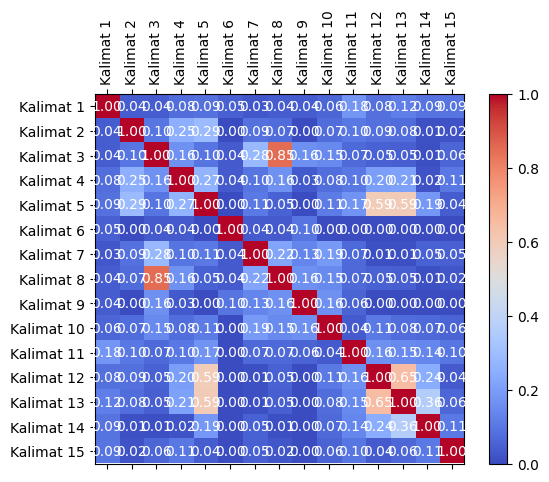

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()


In [ ]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")


Closeness Centrality of 

Jakarta (ANTARA/JACX) – Ketua Umum Partai Gerindra sekaligus bakal calon presiden Prabowo Subianto, secara resmi mengumumkan bahwa putra sulung Presiden Joko Widodo, Gibran Rakabuming Raka, telah dipilih sebagai bakal cawapres dari Partai Gerindra pada Minggu, (22/10/2023).: 18.8843
Closeness Centrality of Sebuah unggahan video di Facebook berdurasi delapan menit menarasikan bahwa KPU menolak pendaftaran Gibran karena dinyatakan cacat hukum.: 20.9030
Closeness Centrality of Dalam video tersebut, narator juga menyebutkan pakar hukum tata negara Denny Indrayana menyebut putusan MK tentang syarat capres-cawapres tidak bisa dijadikan landasan hukum Gibran Rakabuming Raka dalam mendaftar Pilpres 2024.: 22.3940
Closeness Centrality of Berikut narasi dalam unggahan tersebut:
“NEWS HARI INI ~ DINYATAKAN C4CAT HUKUM KPU TOL4K PENDAFTAN CAWAPRES GIBRAN-- - POLITIK TERBARU”

Namun, benarkah KPU menolak pendaftaran Gibran Rakabuming sebagai bakal cawapres?: 18.1336
Closen

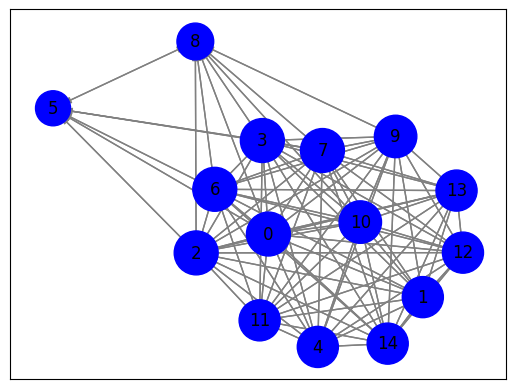

Closeness Centrality (Dari Tertinggi ke Terendah):
Node 0: Closeness Centrality 1.0000
Kalimat: 

Jakarta (ANTARA/JACX) – Ketua Umum Partai Gerindra sekaligus bakal calon presiden Prabowo Subianto, secara resmi mengumumkan bahwa putra sulung Presiden Joko Widodo, Gibran Rakabuming Raka, telah dipilih sebagai bakal cawapres dari Partai Gerindra pada Minggu, (22/10/2023).

Node 2: Closeness Centrality 1.0000
Kalimat: Dalam video tersebut, narator juga menyebutkan pakar hukum tata negara Denny Indrayana menyebut putusan MK tentang syarat capres-cawapres tidak bisa dijadikan landasan hukum Gibran Rakabuming Raka dalam mendaftar Pilpres 2024.

Node 3: Closeness Centrality 1.0000
Kalimat: Berikut narasi dalam unggahan tersebut:
“NEWS HARI INI ~ DINYATAKAN C4CAT HUKUM KPU TOL4K PENDAFTAN CAWAPRES GIBRAN-- - POLITIK TERBARU”

Namun, benarkah KPU menolak pendaftaran Gibran Rakabuming sebagai bakal cawapres?

Node 6: Closeness Centrality 1.0000
Kalimat: (Facebook)

Penjelasan:

Berdasarkan penel

In [ ]:
#membuat grafik berarah (Directed Graph - DiGraph) yang merepresentasikan hubungan antara kalimat-kalimat dalam teks berdasarkan kemiripan (cosine similarity)
import networkx as nx
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality dari yang tertinggi hingga terendah
print("Closeness Centrality (Dari Tertinggi ke Terendah):")
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

for node, closeness in sorted_closeness:
    sentence = sentences[node]  # Akses kalimat yang sesuai dengan node
    print(f"Node {node}: Closeness Centrality {closeness:.4f}")
    print(f"Kalimat: {sentence}")
    print()




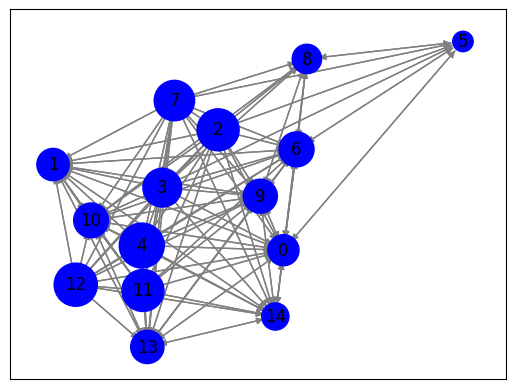

PageRank Centrality (Dari Tertinggi ke Terendah):
Node 4: PageRank Centrality 0.1047
Kalimat: Unggahan video hoaks yang menarasikan KPU tolak pendaftaran Gibran Rakabuming sebagai Cawapres pada 25 Oktober.

Node 12: PageRank Centrality 0.0966
Kalimat: Klaim: KPU tolak pendaftaran Gibran Rakabuming sebagai bakal cawapres pada 25 Oktober
Rating: Hoaks

Cek fakta: Hoaks!

Node 11: PageRank Centrality 0.0916
Kalimat: Dengan demikian, klaim KPU tolak pendaftaran Gibran Rakabuming sebagai Cawapres pada 25 Oktober merupakan hoaks.

Node 2: PageRank Centrality 0.0916
Kalimat: Dalam video tersebut, narator juga menyebutkan pakar hukum tata negara Denny Indrayana menyebut putusan MK tentang syarat capres-cawapres tidak bisa dijadikan landasan hukum Gibran Rakabuming Raka dalam mendaftar Pilpres 2024.

Node 7: PageRank Centrality 0.0847
Kalimat: Dalam artikel tersebut, Pakar hukum tata negara Denny Indrayana menyebut putusan Mahkamah Konstitusi (MK) tentang syarat capres-cawapres tidak bisa dijad

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j, weight=similarity)  # Gunakan similarity sebagai weight

# Hitung PageRank centrality
pagerank_centrality = nx.pagerank(G, weight='weight')

# Visualisasi PageRank centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 10000 for v in pagerank_centrality.values()]  # Ubah ukuran node berdasarkan PageRank, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak PageRank centrality dari yang tertinggi hingga terendah
print("PageRank Centrality (Dari Tertinggi ke Terendah):")
sorted_pagerank = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)

for node, pagerank in sorted_pagerank:
    sentence = sentences[node]  # Akses kalimat yang sesuai dengan node
    print(f"Node {node}: PageRank Centrality {pagerank:.4f}")
    print(f"Kalimat: {sentence}")
    print()


In [ ]:
import pandas as pd

# Hitung betweenness centrality
betweenness= nx.betweenness_centrality(G)

# Cetak DataFrame
print("DataFrame Betweenness Centrality:")
sorted_betweenness = dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))
for node, between in sorted_betweenness.items():
    print(f"Node {node}: {between:.4f}")

DataFrame Betweenness Centrality:
Node 0: 0.0263
Node 2: 0.0263
Node 3: 0.0263
Node 6: 0.0263
Node 7: 0.0263
Node 9: 0.0094
Node 10: 0.0094
Node 8: 0.0037
Node 1: 0.0000
Node 4: 0.0000
Node 5: 0.0000
Node 11: 0.0000
Node 12: 0.0000
Node 13: 0.0000
Node 14: 0.0000


In [ ]:
# Cetak betweenness
top_3_between = list(sorted_betweenness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
databw = {
    "Node": [node for node, _ in top_3_between],
    "Between": [between for _, between in top_3_between],
    "Kalimat": [sentences[node] for node, _ in top_3_between]
}

df_top_3bw = pd.DataFrame(databw)

# Cetak DataFrame
print("Tiga Node Between Teratas")
df_top_3bw

Tiga Node Between Teratas


,Node,Between,Kalimat
0,0,0.026269,\n\r\nJakarta (ANTARA/JACX) – Ketua Umum Parta...
1,2,0.026269,"Dalam video tersebut, narator juga menyebutkan..."
2,3,0.026269,Berikut narasi dalam unggahan tersebut:\n“NEWS...
